In [1]:
import bctDevV2
import numpy as np
from tqdm import tqdm
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
import sys
from scipy.ndimage import zoom 

Populating the interactive namespace from numpy and matplotlib


In [2]:
outfile='/home/kmaamari/lgalaxies/lgalLarge2/MergerTrees/LJDS/treedata/trees_099.0'
trees=bctDevV2.read_binary(outfile)

mOutfile='/home/kmaamari/lgalaxies/lgalMill/MergerTrees/MR/treedata/trees_063.5'
mTrees=bctDevV2.read_binary(mOutfile)

  0%|          | 59/28987 [00:00<01:01, 467.40it/s]

Read 132800 trees with total 12606199 halos


100%|██████████| 28987/28987 [00:03<00:00, 8442.07it/s] 

Read 28987 trees with total 1500436 halos


In [19]:
Len=5
M_Crit200=7
M_Mean200=6
Velx=12
VelDisp=15
Vmax=16
Spin_x=17

leng = []
mcrit = []
mmean = []
vx = []
vdis = []
vmax = []
spin = []

for i in tqdm(range(len(trees))):
    if trees[i][0][Len] > 185:
        leng.append(trees[i][0][Len])
        vx.append(trees[i][0][Velx])
        mcrit.append(trees[i][0][M_Crit200])
        vdis.append(trees[i][0][VelDisp])
        vmax.append(trees[i][0][Vmax])
        spin.append(trees[i][0][Spin_x])

100%|██████████| 132800/132800 [00:00<00:00, 183402.05it/s]


In [24]:
M_Crit200=7
M_Mean200=6
VelDisp=15
Vmax=16
Spin_x=17

mleng = []
mvx = []
mmcrit = []
mmmean = []
mvdis = []
mvmax = []
mspin = []

for i in tqdm(range(len(mTrees))):
    if mTrees[i][0][M_Crit200]*1e10 > 5e11:
        mleng.append(trees[i][0][Len])
        mvx.append(trees[i][0][Velx])    
        mmcrit.append(mTrees[i][0][M_Crit200])
        mvdis.append(mTrees[i][0][VelDisp])
        mvmax.append(mTrees[i][0][Vmax])
        mspin.append(mTrees[i][0][Spin_x])

100%|██████████| 28987/28987 [00:00<00:00, 196977.92it/s]


In [8]:
print("LJ:",min([i for i in mcrit if i != 0]),"to",max([i for i in mcrit if i != 0]))
print("Mill:",min([i for i in mmcrit if i != 0]),"to",max([i for i in mmcrit if i != 0]))

LJ: 9.263399 to 37229.598
Mill: 0.516394 to 29535.242


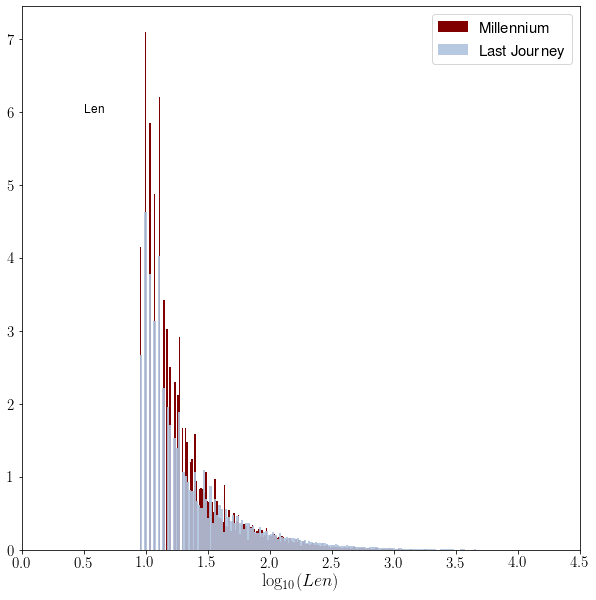

In [57]:
plt.figure(figsize=(10,10))
plt.hist(np.log10([i for i in mleng if i != 0]),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log10([i for i in leng if i != 0]),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend(prop={'size':15})
plt.text(0.5,6,"Len",size=12)
plt.xlim(0,4.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$\mathrm{log_{10}}(Len)$',size=18)
plt.show()

/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


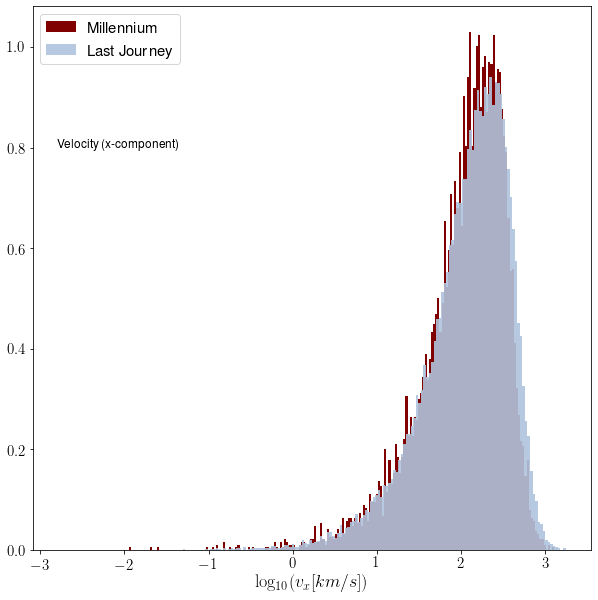

In [62]:
plt.figure(figsize=(10,10))
plt.hist(np.log10([i for i in mvx if i != 0]),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log10([i for i in vx if i != 0]),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend(prop={'size':15})
plt.text(-2.8,0.8,"Velocity (x-component)",size=12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$\mathrm{log_{10}}(v_x [km/s])$',size=18)
plt.show()

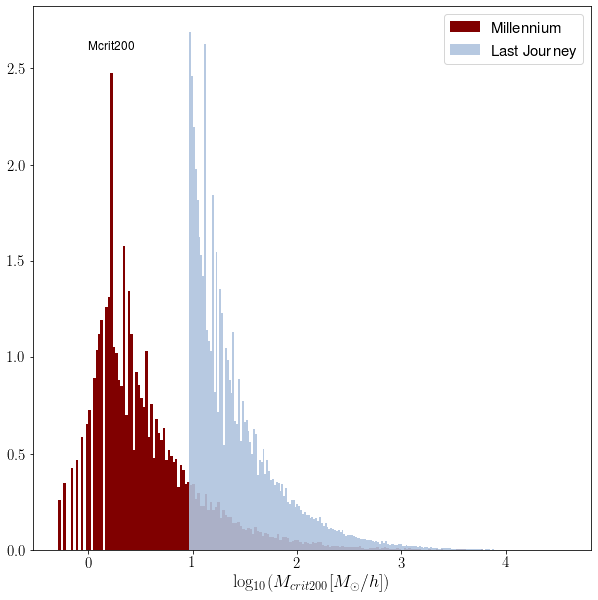

In [53]:
plt.figure(figsize=(10,10))
plt.hist(np.log10([i for i in mmcrit if i != 0]),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log10([i for i in mcrit if i != 0]),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend(prop={'size':15})
plt.text(0,2.6,"Mcrit200",size=12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$\mathrm{log_{10}}(M_{crit200}[M_{\odot}/h])$',size=18)
plt.show()

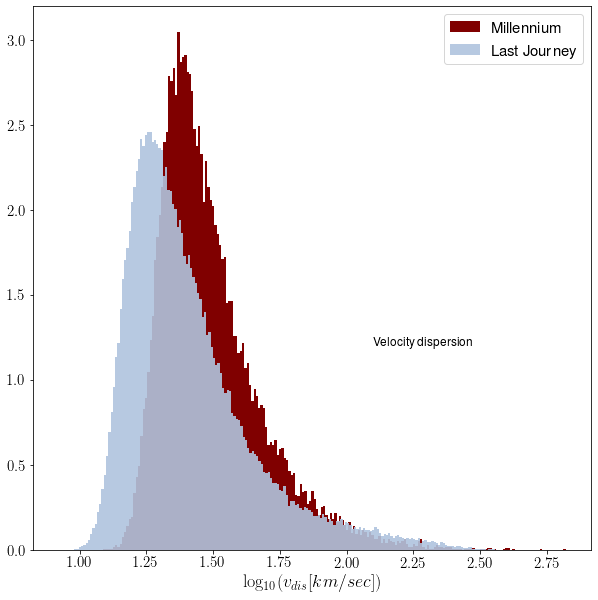

In [40]:
plt.figure(figsize=(10,10))
plt.hist(np.log10([i for i in mvdis if i != 0]),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log10([i for i in vdis if i != 0]),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.text(2.1,1.2,"Velocity dispersion",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$\mathrm{log_{10}}(v_{dis}[km/sec])$',size=18)
plt.show()

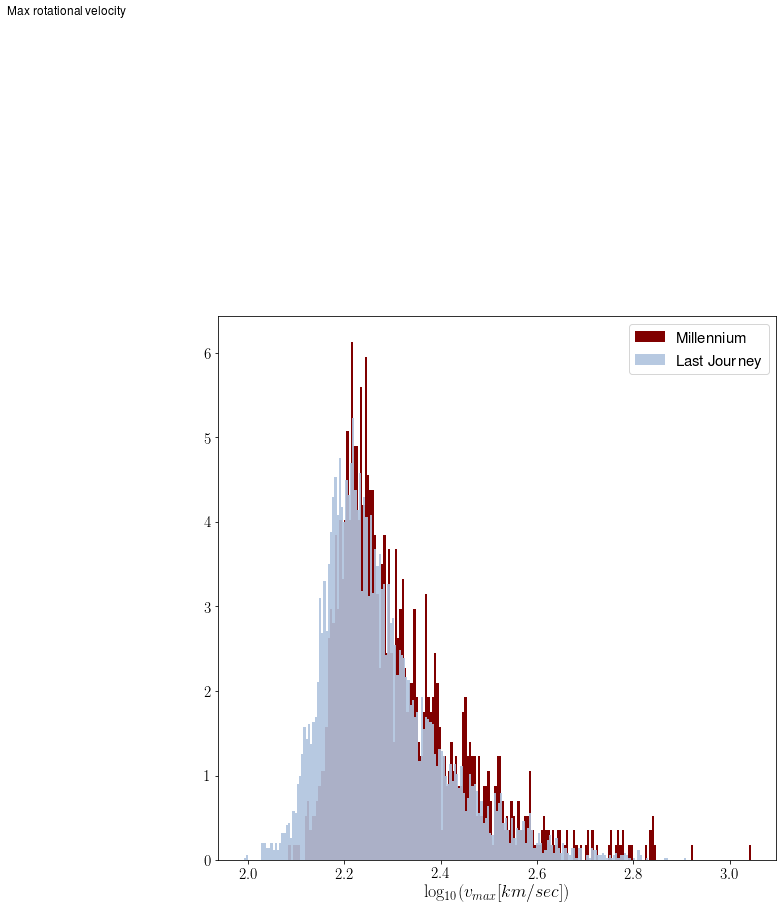

In [25]:
plt.figure(figsize=(10,10))
plt.hist(np.log10([i for i in mvmax if i != 0]),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log10([i for i in vmax if i != 0]),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.text(1.5,10,"Max rotational velocity",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$\mathrm{log_{10}}(v_{max}[km/sec])$',size=18)
plt.show()

/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/kmaamari/usr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


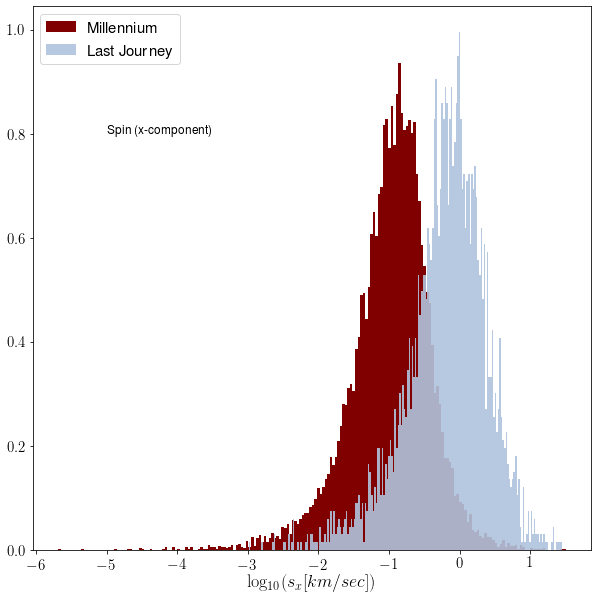

In [46]:
plt.figure(figsize=(10,10))
plt.hist(np.log10([i for i in mspin if i != 0]),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log10([i for i in spin if i != 0]),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.text(-5,0.8,"Spin (x-component)",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$\mathrm{log_{10}}(s_x[km/sec])$',size=18)
plt.show()

---

In [ ]:
lens = []
for i in range(len(trees)):
    length=trees[i][0]['Len']
    if length<=20:
#         lens0.append(length)
        trees[i][0]['Len']*=(100/0.238)
    elif length>20 and length<=50:
        trees[i][0]['Len']*=(100/0.493)
#         lens20.append(length)
    elif length>50 and length<=100:
        trees[i][0]['Len']*=(100/1.339)
#         lens50.append(length)
    elif length>100 and length<=200:
        trees[i][0]['Len']*=(100/2.464)
#         lens100.append(length)
    elif length>200 and length<=500:
        trees[i][0]['Len']*=(100/3.959)
#         lens100.append(length)        
    elif length>500 and length<=1000:
        trees[i][0]['Len']*=(100/11.417)
#         lens500.append(length)
    elif length>1000 and length<=5000:
        trees[i][0]['Len']*=(100/15.132)
#         lens500.append(length)        
    elif length>5000:
        trees[i][0]['Len']*=(100/146.902)
#         lens1000.append(length)
    lens.append(trees[i][0]['Len'])

In [ ]:
lens = np.array(lens)

In [ ]:
print(125/(len(lens[lens<20])/len(lens)))
print(125/(len(lens[(lens>20) & (lens<50)])/len(lens)))
print(125/(len(lens[(lens>50) & (lens<100)])/len(lens)))
print(125/(len(lens[(lens>100) & (lens<200)])/len(lens)))
print(125/(len(lens[(lens>200) & (lens<500)])/len(lens)))
print(125/(len(lens[(lens>500) & (lens<1000)])/len(lens)))
print(125/(len(lens[(lens>1000) & (lens<5000)])/len(lens)))
print(125/(len(lens[(lens>5000) & (lens<10000)])/len(lens)))

In [ ]:
bins = 10 ** np.linspace(np.log10(10), np.log10(10000), 10)
print(bins)

In [ ]:
%matplotlib inline
plt.hist(lens, density=False, bins = 10 ** np.linspace(np.log10(7), np.log10(10000), 50))
plt.xscale('log')
plt.show()